<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 01 - TRỰC QUAN HOÁ DỮ LIỆU 📌
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Giai đoạn 2 - EDA (tiếp) 📌
</div>

In [22]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose


warnings.simplefilter('ignore')

### Đọc dữ liệu

In [23]:
df = pd.read_csv('./data/Water_Cleaner_2.csv', parse_dates=['Date'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

df.head()

,Date,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry,Rainfall,Depth_to_Groundwater_log,Depth_to_Groundwater_diff_1,Depth_to_Groundwater_diff_2
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.0,3.435553,0.000000,0.000000
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,2.0,3.427004,0.264286,0.264286
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.2,3.415100,0.364286,0.100000
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,4.1,3.401816,0.401429,0.037143
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,9.9,3.394173,0.228571,-0.172857


In [24]:
df['Date'] = pd.to_datetime(df['Date'])


### Tính xu hướng, tính mùa vụ, nhiễu của các yếu tố 


**Lý do**
- **Hiểu rõ cấu trúc dữ liệu**: phân rã chuỗi thời gian thành các thành phần giúp chúng ta hiểu rõ hơn về dữ liệu: nhận diện các xu hướng dài hạn, tính mùa vụ..
- **Phát hiện outlier:** phát hiện ra các điểm dữ liệu bất thường
- **Lựa chọn mô hình phù hợp**: dự vào trend và seasonal để lựa chọn mô hình phù hợp.  Một số mô hình yêu cầu loại bỏ trend như ARIMA trước khi huấn luyện.

Chuỗi thời gian có thể được phân rã theo mô hình cộng thành ba thành phần chính như sau:

$Y(t) = T(t) + S(t) + R(t)$

Trong đó:
- $Y(t)$ là giá trị chuỗi thời gian tại thời điểm $t$.
- $T(t)$ là thành phần xu hướng (trend) tại thời điểm $t$.
- $S(t)$ là thành phần mùa vụ (seasonal) tại thời điểm $t$.
- $R(t)$ là thành phần phần dư(residual) tại thời điểm $t$.

**Lý do không sử dụng mô hình nhân:**
- Vì dữ liệu có cả số âm và số 0 nên ta không dùng mô hình nhân

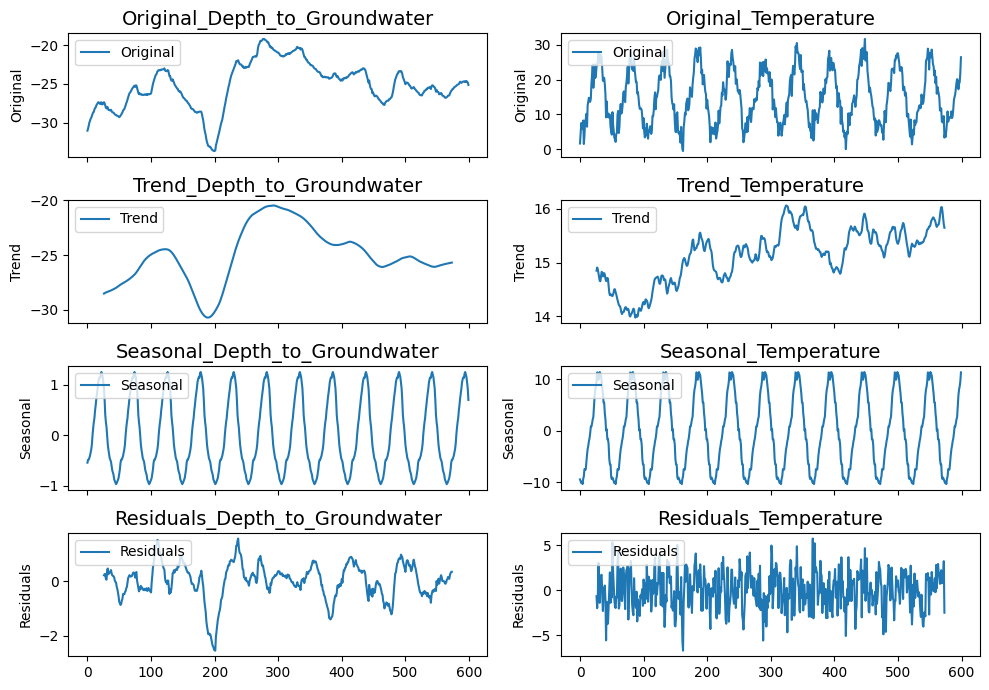

In [25]:
res_add = seasonal_decompose(x=df.Depth_to_Groundwater, model='additive', period=52)

def seas_decomp_plots(original1, original2):
    originals = [original1, original2]
    fig, axes = plt.subplots(4, 2, sharex=True, figsize=(10,7))
    col_names = [original1.name, original2.name]
    y_labels = ['Original', 'Trend', 'Seasonal', 'Residuals']
    
    for i, (original, col_name) in enumerate(zip(originals, col_names)):
        decomposition = seasonal_decompose(x=original, model='additive', period=52)
        
        axes[0, i].plot(original, label='Original')
        axes[0, i].set_title(f'{y_labels[0]}_{col_name}', fontsize=14)
        axes[0, i].legend(loc='upper left')
        axes[0, i].set_ylabel(f'{y_labels[0]}')
        
        axes[1, i].plot(decomposition.trend, label='Trend')
        axes[1, i].set_title(f'{y_labels[1]}_{col_name}', fontsize=14)
        axes[1, i].legend(loc='upper left')
        axes[1, i].set_ylabel(f'{y_labels[1]}')
        
        axes[2, i].plot(decomposition.seasonal, label='Seasonal')
        axes[2, i].set_title(f'{y_labels[2]}_{col_name}', fontsize=14)
        axes[2, i].legend(loc='upper left')
        axes[2, i].set_ylabel(f'{y_labels[2]}')
        
        axes[3, i].plot(decomposition.resid,label='Residuals')
        axes[3, i].set_title(f'{y_labels[3]}_{col_name}', fontsize=14)
        axes[3, i].legend(loc='upper left')
        axes[3, i].set_ylabel(f'{y_labels[3]}')
    
    plt.tight_layout()
    plt.show()
seas_decomp_plots(df.Depth_to_Groundwater, df.Temperature)

**Nhận xét**

Phân rã cột `Depth_to_Groundwater`:
- Trend: Không có xu hướng chung tăng dần hay giảm dần cho cột `Depth_to_Groundwater`
    - Ban đầu, xu hướng tăng rồi  giảm mạnh xuống mức thấp nhất
    - Sau đó, độ sâu mực nước tăng mạnh đến mức tối đa
    - Sau khi chạm đỉnh, mực nước có xu hướng giảm dần, khá ổn định so với hai giai đoạn trước

- Seasonality:
    - Đường mùa vụ có dạng hình sin cho thấy một mô hình lặp lại có chu kỳ ổn định
- Residuals:
    - Residuals dao động từ -2 đến 1 và không thể giải thích được bằng trend hay seasonal.
    - Không có sự tăng/ giảm đều đặn, có các yếu tố ngẫu nhiên trong dữ liệu


Phân rã cột `Temperature`:
- Trend: Không có xu hướng chung tăng dần hay giảm dần cho cột `Temperature`
    - Xu hướng tăng giảm không ổn định
- Seasonality:
    - Đường mùa vụ cho thấy một mô hình lặp lại có chu kỳ rõ ràng.
    - Mỗi chu kỳ dao động từ -10 đến 10, cho thấy sự thay đổi nhiệt độ định kỳ trong năm.
    - Điều này có thể liên quan đến các mùa trong năm, nhiệt độ cao hơn vào mùa hè và thấp hơn vào mùa đông.
- Residuals:
    - Phần dư dao động từ -5 đến 5 và không có tính chu kì
    - dao động này cho thấy các yếu tố ngẫu nhiên hoặc nhiễu không thể giải thích bởi trend hay seasonal.

### Độ sâu mực nước tăng giảm như thế nào trong một năm
**Lý do**: phân tích biến đổi mức độ sâu của nước ngầm theo thời gian trong năm. 

**Mục tiêu**
Phát hiện ra các xu hướng mùa vụ, độ sâu của nước ngầm có thể tăng/ giảm trong các tháng nào

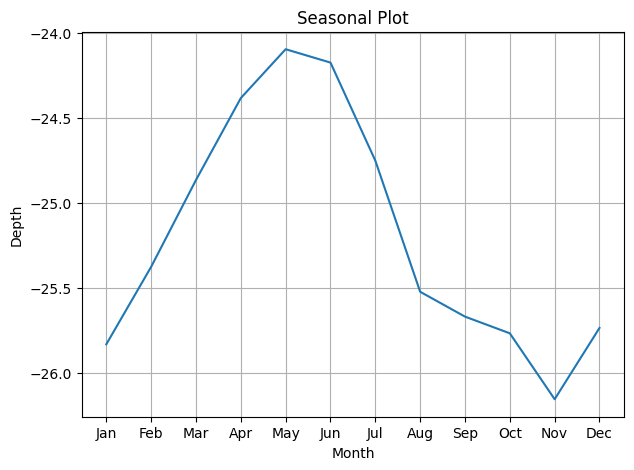

In [26]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(7, 5)) 
sns.lineplot(x=df['Date'].dt.month, y=df['Depth_to_Groundwater'], ci=None) 
plt.xlabel('Month') 
plt.ylabel('Depth') 
plt.title('Seasonal Plot') 
plt.xticks(range(1, 13), labels=[ 
           'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 
plt.grid(True) 
plt.show() 

**Nhận xét**:
- Độ sâu mực nước ngầm thường tăng vào khoảng tháng 1 đến tháng 5 và đạt đỉnh tại tháng năm
- Sau đó giảm dần đến tháng 11 và bắt đầu tăng lại cho năm sau


#### Biểu đồ seasonal qua các năm

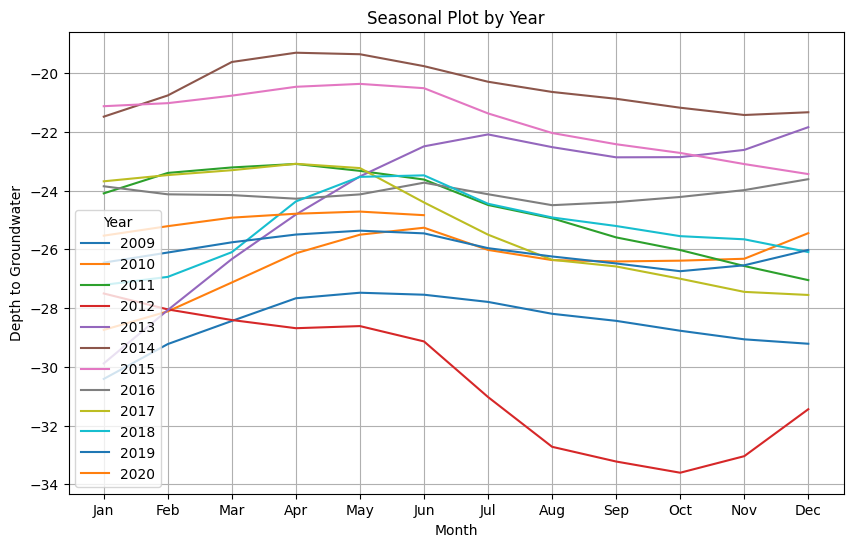

In [27]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Depth_to_Groundwater', hue='Year', palette='tab10', ci=None)
plt.xlabel('Month')
plt.ylabel('Depth to Groundwater')
plt.title('Seasonal Plot by Year')
plt.xticks(range(1, 13), labels=[
           'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

**Nhận xét**:
- Nhìn chung mực nước các năm đều có xu hướng tăng dần từ khoảng tháng 1 đến tháng 5,6 và bắt đầu giảm dần đến mùa đông
- Độ sâu mực nước ngầm biến động theo năm. Tương đồng với dữ liệu không có tính stationary theo kiểm định trên.
